In [1]:
import torch
import pandas as pd
import numpy as np
import pickle as pk

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, IncrementalPCA

from check_lang import lang_checker_langdetect, id_to_en
from functions import *
from Preprocessing import *

# pd.options.mode.chained_assignment = None  # default='warn'

d:\GitHub\Jurnal-Clustering\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df = pd.read_csv('data/data_sinta_raw_s5_full.csv')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

df.title = df.title.apply(lambda x : x.lower())

df

,jid,eissn,desc,title,date
0,10003,25484834,The main objective of this study was to conduc...,assessment of computational thinking: sebuah k...,2023-08-30
1,10003,25484834,This research aimed to explore the need for di...,exploring the digital learning materials needs...,2023-08-30
2,10003,25484834,Computational thinking (CT) has gained attenti...,kajian literatur sistematis tentang upaya meni...,2023-08-30
3,10003,25484834,Education is a determinant of the progress of ...,manajemen evaluasi pendidikan berbasis teknolo...,2023-08-30
4,10003,25484834,The purpose of this study was to determine the...,melalui metode diskusi dengan media gambar ser...,2023-08-30
...,...,...,...,...,...
331880,9975,27227162,Fluktuasi suhu yang sangat tinggi yang menyeba...,implementasi fuzzy logic untuk menilai kondisi...,2023-01-10
331881,9975,27227162,Rumah kost merupakan usaha rumahan yang menyed...,perancangan sistem informasi penyewaan rumah k...,2021-01-28
331882,9975,27227162,Abstrak PT. AXA Mandiri Financial Service meru...,analisis penerapan keamanan sistem informasi p...,2019-08-07
331883,9975,27227162,Virus Corona pertama kali terjadi di negara Ch...,analisis kesuksesan aplikasi pusat informasi &...,2022-01-01


In [7]:
# df['data_cleaned'] = df.abstract.apply(preprocess_text)
# df['data_cleaned'] = df.loc[:, ['title', 'data_cleaned']].apply(lambda x : '{} {}'.format(x[0], x[1]), axis = 1)  

# df['data_cleaned'] = df.desc.apply(preprocess_text)
# df['data_cleaned'] = df.loc[:, ['title', 'data_cleaned']].apply(lambda x : '{} {}'.format(x[0], x[1]), axis = 1)  

# df['lang'] = df.data_cleaned.apply(lang_checker_langdetect)
df = df[df.lang.isin(['en', 'id'])]

df['label'] = df.eissn
df.loc[:, 'label'] = 0

df

,jid,eissn,desc,title,date,data_cleaned,lang,label
0,10003,25484834,The main objective of this study was to conduc...,assessment of computational thinking: sebuah k...,2023-08-30,assessment of computational thinking: sebuah k...,en,0
1,10003,25484834,This research aimed to explore the need for di...,exploring the digital learning materials needs...,2023-08-30,exploring the digital learning materials needs...,en,0
2,10003,25484834,Computational thinking (CT) has gained attenti...,kajian literatur sistematis tentang upaya meni...,2023-08-30,kajian literatur sistematis tentang upaya meni...,en,0
3,10003,25484834,Education is a determinant of the progress of ...,manajemen evaluasi pendidikan berbasis teknolo...,2023-08-30,manajemen evaluasi pendidikan berbasis teknolo...,en,0
4,10003,25484834,The purpose of this study was to determine the...,melalui metode diskusi dengan media gambar ser...,2023-08-30,melalui metode diskusi dengan media gambar ser...,en,0
...,...,...,...,...,...,...,...,...
331880,9975,27227162,Fluktuasi suhu yang sangat tinggi yang menyeba...,implementasi fuzzy logic untuk menilai kondisi...,2023-01-10,implementasi fuzzy logic untuk menilai kondisi...,id,0
331881,9975,27227162,Rumah kost merupakan usaha rumahan yang menyed...,perancangan sistem informasi penyewaan rumah k...,2021-01-28,perancangan sistem informasi penyewaan rumah k...,id,0
331882,9975,27227162,Abstrak PT. AXA Mandiri Financial Service meru...,analisis penerapan keamanan sistem informasi p...,2019-08-07,analisis penerapan keamanan sistem informasi p...,id,0
331883,9975,27227162,Virus Corona pertama kali terjadi di negara Ch...,analisis kesuksesan aplikasi pusat informasi &...,2022-01-01,analisis kesuksesan aplikasi pusat informasi &...,id,0


In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_checkpoint = 'bert-base-cased'
model_checkpoint2 = 'indobenchmark/indobert-base-p1'

bert_path = 'model/bert_pipeline3_3_123.pt'
model_bert = BertClassifierEmbed(123, model_checkpoint)
checkpoint_bert = torch.load(bert_path)
model_bert.load_state_dict(checkpoint_bert)

indobert_path = 'model/indobert_pipeline3_3_55.pt'
model_indobert = BertClassifierEmbed(55, model_checkpoint2)
checkpoint_indobert = torch.load(indobert_path)
model_indobert.load_state_dict(checkpoint_indobert)

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

<All keys matched successfully>

In [9]:
journal_type = 'pipeline_3_1'
journal_id = 'sinta_5'

file_path = os.path.join('src', journal_type)

if not os.path.exists(file_path):
    os.mkdir(file_path)

In [10]:
n = len(df) # how many rows we have in the X_set
chunk_size = 1000 # how many rows we feed to IPCA at a time, the divisor of n

ipca = IncrementalPCA(n_components=2, batch_size=16)

ipca = pk.load(open(f"{file_path}/{'baseline'}/pca.pkl",'rb'))

In [11]:
X = None

index = []

for i in range(0, n//chunk_size):
    data = df.iloc[i*chunk_size : (i+1)*chunk_size]

    selected_journal_en = data[data.lang == 'en']
    selected_journal_id = data[data.lang == 'id']

    index = index + list(selected_journal_en.index) + list(selected_journal_id.index)

    if len(selected_journal_en) < 1:
        embeddings = embed(selected_journal_id, model_checkpoint2, model_indobert, device = device)
    elif len(selected_journal_id) < 1:
        embeddings = embed(selected_journal_en, model_checkpoint, model_bert, device = device)
    else:
        embedding_en = embed(selected_journal_en, model_checkpoint, model_bert, device = device)
        embedding_id = embed(selected_journal_id, model_checkpoint2, model_indobert, device = device)

        embeddings = np.append(embedding_en, embedding_id, axis = 0)

    X_ = embeddings.reshape(embeddings.shape[0], -1)

    pca_transform = ipca.transform(X_)

    if X is None:
        X = pca_transform
    else:
        X = np.append(X, pca_transform, axis = 0)

    print(f'embedding ke {(i+1)*1000} berhasil')


d:\GitHub\Jurnal-Clustering\venv\lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


embedding ke 1000 berhasil
embedding ke 2000 berhasil
embedding ke 3000 berhasil
embedding ke 4000 berhasil
embedding ke 5000 berhasil
embedding ke 6000 berhasil
embedding ke 7000 berhasil
embedding ke 8000 berhasil
embedding ke 9000 berhasil
embedding ke 10000 berhasil
embedding ke 11000 berhasil
embedding ke 12000 berhasil
embedding ke 13000 berhasil
embedding ke 14000 berhasil
embedding ke 15000 berhasil
embedding ke 16000 berhasil
embedding ke 17000 berhasil
embedding ke 18000 berhasil
embedding ke 19000 berhasil
embedding ke 20000 berhasil
embedding ke 21000 berhasil
embedding ke 22000 berhasil
embedding ke 23000 berhasil
embedding ke 24000 berhasil
embedding ke 25000 berhasil
embedding ke 26000 berhasil
embedding ke 27000 berhasil
embedding ke 28000 berhasil
embedding ke 29000 berhasil
embedding ke 30000 berhasil
embedding ke 31000 berhasil
embedding ke 32000 berhasil
embedding ke 33000 berhasil
embedding ke 34000 berhasil
embedding ke 35000 berhasil
embedding ke 36000 berhasil
e

In [12]:
data = df.iloc[(i+1)*chunk_size:]

selected_journal_en = data[data.lang == 'en']
selected_journal_id = data[data.lang == 'id']

index = index + list(selected_journal_en.index) + list(selected_journal_id.index)

if len(selected_journal_en) < 1:
    embeddings = embed(selected_journal_id, model_checkpoint2, model_indobert, device = device)
elif len(selected_journal_id) < 1:
    embeddings = embed(selected_journal_en, model_checkpoint, model_bert, device = device)
else:
    embedding_en = embed(selected_journal_en, model_checkpoint, model_bert, device = device)
    embedding_id = embed(selected_journal_id, model_checkpoint2, model_indobert, device = device)

    embeddings = np.append(embedding_en, embedding_id, axis = 0)


X_ = embeddings.reshape(embeddings.shape[0], -1)

pca_transform = ipca.transform(X_)

X = np.append(X, pca_transform, axis = 0)

In [13]:
len(X), len(index), len(df)

(316738, 316738, 316738)

In [14]:
with open(f"{file_path}/{'baseline'}/kmeans.pkl", "rb") as f:
    kmeans = joblib.load(f)

kmeans_labels = kmeans.predict(X)
kmeans_labels

array([ 9, 34,  6, ..., 32, 32, 11])

In [15]:
df_res = df.loc[index]

df_res['kmeans_labels'] = kmeans_labels

cluster_labels = kmeans.labels_

# Mendapatkan koordinat pusat cluster
centroids = kmeans.cluster_centers_

# Menghitung jarak antara setiap titik data dengan centroid
jarak_ke_centroid = centroid_dist(kmeans, X, label=kmeans_labels)

# Menentukan batas jarak yang dianggap sebagai "outscoop"
threshold = outscoop_threshold(jarak_ke_centroid)

scoop_labels = np.ones(len(X))
scoop_labels[jarak_ke_centroid > threshold] = -1

save_data(journal_id, journal_type, kmeans, threshold, X, df_res[['data_cleaned', 'eissn', 'lang', 'kmeans_labels']], scoop_labels)

print("Data sebaran PCA telah disimpan.")

d:\GitHub\Jurnal-Clustering\functions.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label'] = scoop_labels


Data sebaran PCA telah disimpan.


d:\GitHub\Jurnal-Clustering\functions.py:59: UserWarning: The palette list has more values (41) than needed (40), which may not be intended.
  plot = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='plot_color', data=df_pca, palette=cluster_palette)


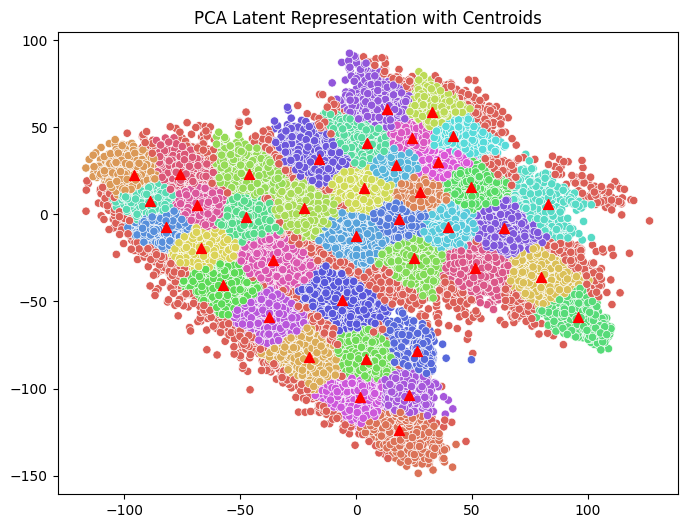

d:\GitHub\Jurnal-Clustering\functions.py:59: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  plot = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='plot_color', data=df_pca, palette=cluster_palette)


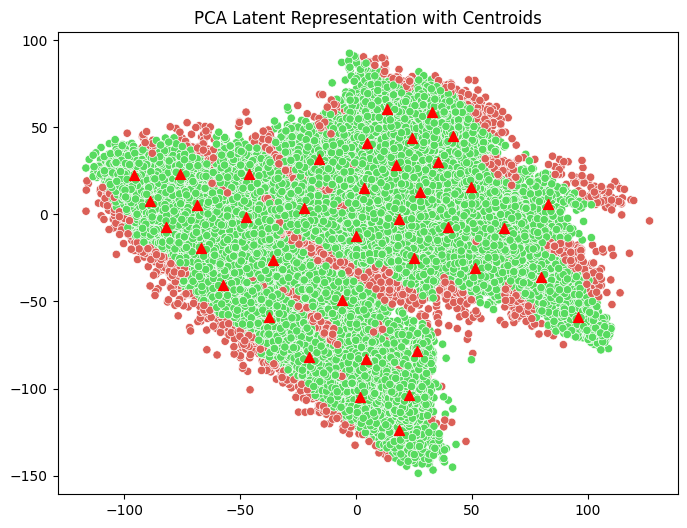

In [43]:
journal_type = 'pipeline_3_1'
journal_id = 'sinta_1'

kmeans, threshold, X, df_res = load_data(journal_id, journal_type)
# journal = list(df_res.journal.apply(lambda x : 1 if x == '25277456' else 0))
scoop_labels = list(df_res.Label)
lang = list(df_res.lang)
# journal = list(df_res.journal)

plot_vector_distribution(X, kmeans, scoop_labels, check_outscoop='True', label = df_res.kmeans_labels, lang = lang)

plot_vector_distribution(X, kmeans, scoop_labels, check_outscoop='focus', label = df_res.kmeans_labels, lang = lang)

In [46]:
df_res.journal.unique()

array(['25024760', '23387238', '2442-8620', '25278045', '27224708',
       '24610399', '26141566', '24423084', '27155072', '24769304',
       '26148013', '27765938', '2406825x', '20888708', '22528938',
       '25488465', '25023357', '24070610', '24610275', '23029277',
       '24610771', '25499904', '22524940', '24606952', '23029285',
       '24606278', '25277456', '25494333', '20854722', '24609196',
       '2338557X', '24432555', '25025791', '24606618', '26156636',
       '24078646', '23548509', '25992147', '24607010', '20888694',
       '24429899', '23556544', '25493167', '25481592', '23556145',
       '23385499', '19782993', '25989685', '24609285', '23549203',
       '24778036', '25483161', '27222594', '25483382', '25027883',
       '24774073', '27156079', '25495747', '26153386', '24067598',
       '24077542', '25992570', '24068799', '24068195', '25029266',
       '23561424', '23385510', '25279238', '23389486', '24429325',
       '2615790X', '26219468', '20864094', '25804391', '24601

C:\Users\rarmn\AppData\Local\Temp\ipykernel_7412\3260698920.py:54: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  plot = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='plot_color', data=df_pca, palette=cluster_palette)


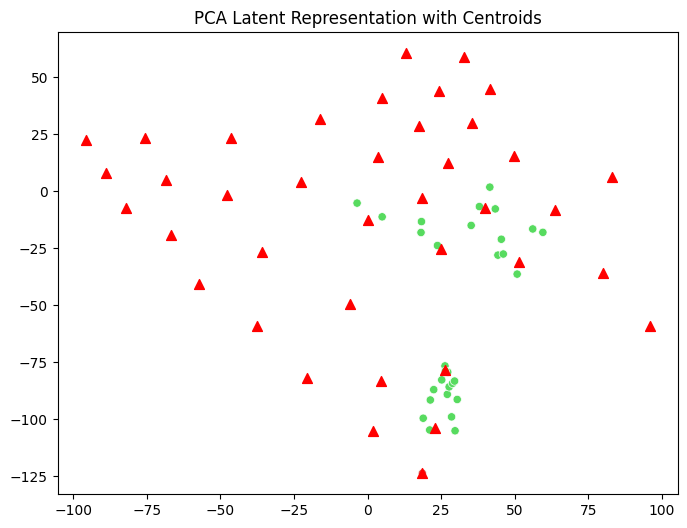

In [96]:
index = df_res[df_res.journal == '26228645'].index

df_res_idx = df_res.loc[index]

plot_vector_distribution(X[index], kmeans, list(df_res_idx.Label), check_outscoop='focus', label = list(df_res_idx.kmeans_labels), lang = list(df_res_idx.lang))


# df_pca = pd.DataFrame(X[index], columns=['Dimension 1', 'Dimension 2'])
# plot = sns.scatterplot(x='Dimension 1', y='Dimension 2', data=df_pca)
# plot.set(xlabel = None)
# plot.set(ylabel = None)
# plot.legend([],[], frameon=False)

# plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=50, label='Centroids')

In [59]:
df_res_idx[df_res_idx.Label == -1]

,Unnamed: 0,data_cleaned,journal,lang,kmeans_labels,Label
47520,47612,discourse on relations between indonesia and p...,24075825,en,13,-1.0
47536,47663,webers ideal type and the indonesian historica...,24075825,en,13,-1.0
47540,47671,baju kurung or baju kebaya framing the history...,24075825,en,13,-1.0


In [35]:
df_res_idx.groupby('kmeans_labels').min()[['data_cleaned']]

,data_cleaned
kmeans_labels,
0,a high frequency converter for ev applicationp...
1,indonesian perceptions on online learning amid...
2,a clustering expert system using particle swar...
3,a bio inspired maximum power point tracking co...
5,p profile adaptive mac protocol for nonsafety...
6,a comparative analysis of classification techn...
7,spatial distribution pattern of tarsius larian...
8,a conceptual framework for gamified learning m...
9,a bootstrap aggregation approach for adequate ...


In [22]:
df_res_idx[df_res_idx.kmeans_labels == 0].data_cleaned.values

def word_counter(listStrings):
    words = {}
    for string in listStrings:
        for word in string.split():
            if word.lower() not in words:
                words[word.lower()] = 1
            words[word.lower()] += 1
    return words

test = word_counter(list(df_res_idx[df_res_idx.kmeans_labels == 0].data_cleaned.values))
test

{'prediction': 2,
 'of': 482,
 'a': 288,
 'new': 28,
 'cascaded': 35,
 'hybrid': 32,
 'multilevel': 68,
 'inverter': 198,
 'with': 168,
 'less': 27,
 'device': 10,
 'countpmultilevel': 2,
 'inverters': 49,
 'have': 21,
 'been': 37,
 'opted': 2,
 'for': 202,
 'high': 76,
 'power': 208,
 'applications': 24,
 'due': 14,
 'to': 292,
 'reduced': 31,
 'harmonic': 50,
 'distortion': 28,
 'voltage': 228,
 'stress': 12,
 'and': 449,
 'modular': 3,
 'structure': 8,
 'this': 115,
 'work': 14,
 'proposes': 16,
 'modified': 16,
 'hbridge': 35,
 'using': 102,
 'auxiliary': 8,
 'switch': 22,
 'proposed': 124,
 'produces': 15,
 'five': 15,
 'levels': 21,
 'output': 93,
 'devices': 12,
 'clamping': 4,
 'diodes': 8,
 'as': 83,
 'phase': 55,
 'nine': 3,
 'line': 17,
 'the': 1054,
 'are': 92,
 'decided': 2,
 'based': 85,
 'on': 65,
 'not': 6,
 'in': 251,
 'paper': 85,
 'performance': 67,
 'measured': 2,
 'terms': 11,
 'however': 8,
 'by': 89,
 'increase': 8,
 'number': 22,
 'switches': 33,
 'low': 31,
 's

In [24]:
sorted(test.items(), key=lambda x:x[1], reverse=True)

[('the', 1054),
 ('of', 482),
 ('and', 449),
 ('is', 311),
 ('to', 292),
 ('a', 288),
 ('in', 251),
 ('voltage', 228),
 ('power', 208),
 ('for', 202),
 ('inverter', 198),
 ('with', 168),
 ('converter', 163),
 ('control', 149),
 ('proposed', 124),
 ('this', 115),
 ('using', 102),
 ('system', 99),
 ('output', 93),
 ('are', 92),
 ('current', 91),
 ('by', 89),
 ('based', 85),
 ('paper', 85),
 ('as', 83),
 ('high', 76),
 ('controller', 70),
 ('multilevel', 68),
 ('dc', 68),
 ('performance', 67),
 ('used', 66),
 ('pv', 66),
 ('on', 65),
 ('level', 63),
 ('switching', 59),
 ('has', 59),
 ('motor', 59),
 ('energy', 57),
 ('phase', 55),
 ('simulation', 51),
 ('which', 51),
 ('harmonic', 50),
 ('results', 50),
 ('inverters', 49),
 ('an', 49),
 ('boost', 48),
 ('topology', 47),
 ('source', 45),
 ('technique', 45),
 ('modulation', 44),
 ('matlabsimulink', 44),
 ('method', 43),
 ('that', 42),
 ('fed', 41),
 ('be', 40),
 ('conventional', 38),
 ('been', 37),
 ('photovoltaic', 37),
 ('dcdc', 36),
 ('c

In [19]:
df_res_idx[df_res_idx.kmeans_labels == 0].sample().data_cleaned.values[-1]

'novel switching technique for five leg inverter in  dual motor controlpspanthis work presents a novel switching technique for five leg inverter in dual motor control as the technology advances in industry requirements in reducing the cost plays an important role with reliable product design in conventional method the six legs are used in  three phase voltage source inverters vsi to control  motors this proposed technique will give the improved performance of speed control for dual motor control using five leg inverter fli new proposed method suggests to use inverter legs instead of inverter legs to control  induction motors new switching technique proposed in fli system is designed in effective way that improved performance and total harmonic distortion of  achieved the load sharing on common leg is called common mode cm of operation in this new method closed loop control designed by using space vector pulse width modulation svpwm and direct torque control dtc in fli technology with t

In [29]:
df_res_idx.sort_values('kmeans_labels').to_csv('kmeans_label_25024760_pipeline31_sinta1.csv', index=False)

In [17]:
outscope = df_res[scoop_labels == -1]
outscope.to_csv(f'outscope_{journal_id}_pipeline3_1.csv')

KeyError: False